<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---

In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt


from skimage import io
from skimage import filters
from skimage import color
from skimage.transform import pyramid_laplacian

## Compute image derivatives

Linear filters are being used to compute image $h(x, y)$ derivaties  

$$ \frac{d}{dx}h(x, y) \qquad \text{and}\qquad \frac{d}{dy}h(x, y)$$

result in horizontal and vertical edges. The following filters are being used to approximate the partial derivatives:

$$
\left( \begin{array}{ccc}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 \end{array} \right)
\qquad
\text{and}
\qquad
\left( \begin{array}{ccc}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1 \end{array} \right)
$$

In [3]:
image = io.imread("../images/retina-image.jpg")
grayscale = color.rgb2gray(image)
image = grayscale

In [4]:
partial_x = filters.sobel_v(image)
partial_y = filters.sobel_h(image)

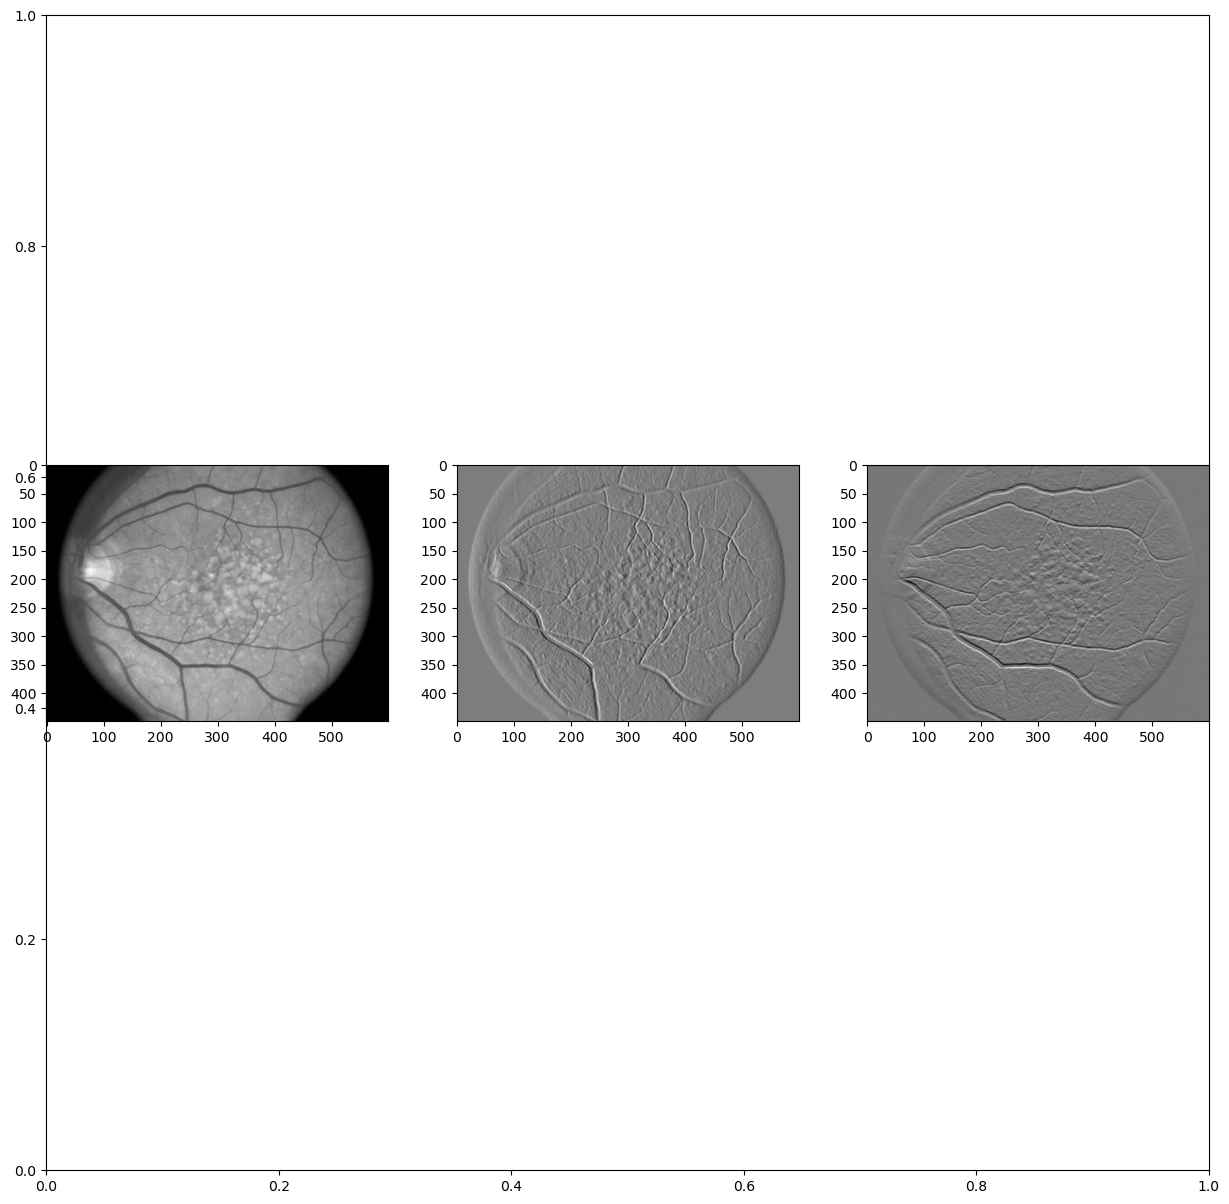

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(partial_x, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(partial_y, cmap='gray')
plt.show()

## Compute the gradient magnitude

Compute the image gradient as

$$ \nabla h(x, y) = \partial_x \,h(x,y) + \partial_y \, h(x, y) $$

Gradient magnitude $|\nabla h(x,y)|$ and angle can be calculated easily. 

In [6]:
gradient = partial_x + partial_y
gradient_magnitude = np.sqrt(partial_x**2 + partial_y**2)
gradient_angle = np.arctan2(partial_x, partial_y)

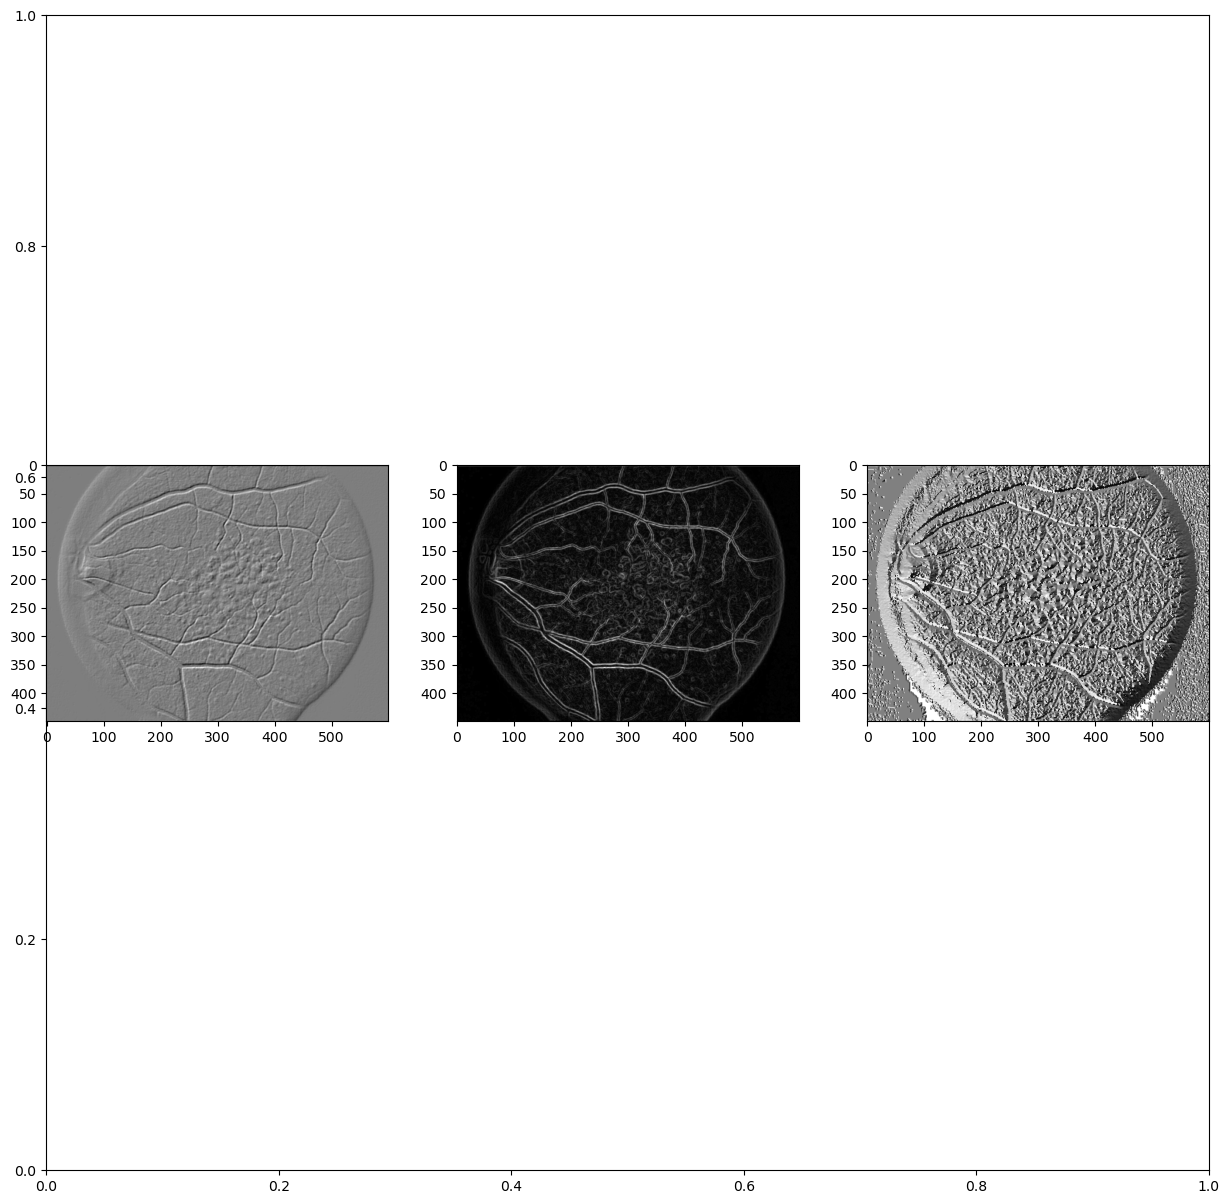

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(gradient, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(gradient_angle, cmap='gray')
plt.show()